<a href="https://colab.research.google.com/github/Brigitalia/Anemia/blob/main/Anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/SKRIPSI/anemia.csv')

In [ ]:
data.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
data.isnull().sum() #checking for total null values

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


Cek berapa banyak orang yang mengalami anemia dari dataset. Cek apakah seimbang atau tidak seimbang

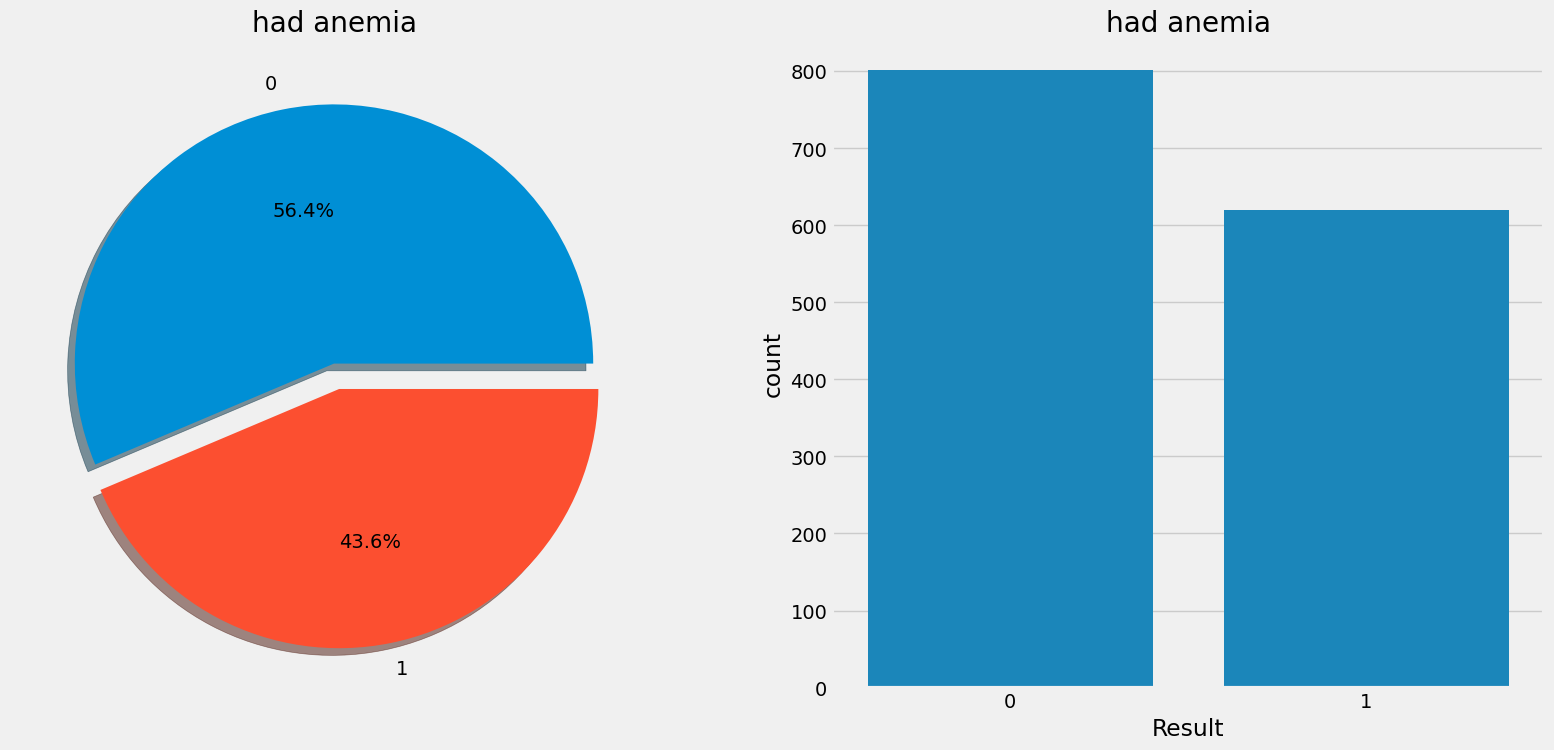

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Membuat pie chart
data['Result'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('had anemia')
ax[0].set_ylabel('')

# Membuat countplot dengan sns
sns.countplot(x='Result', data=data, ax=ax[1])  # Menambahkan x= sebelum 'Result'
ax[1].set_title('had anemia')

plt.show()


Kategori Fitur berdasar Gender

In [ ]:
data.groupby(['Gender','Result'])['Result'].count()

Gender  Result
0       0         473
        1         208
1       0         328
        1         412
Name: Result, dtype: int64

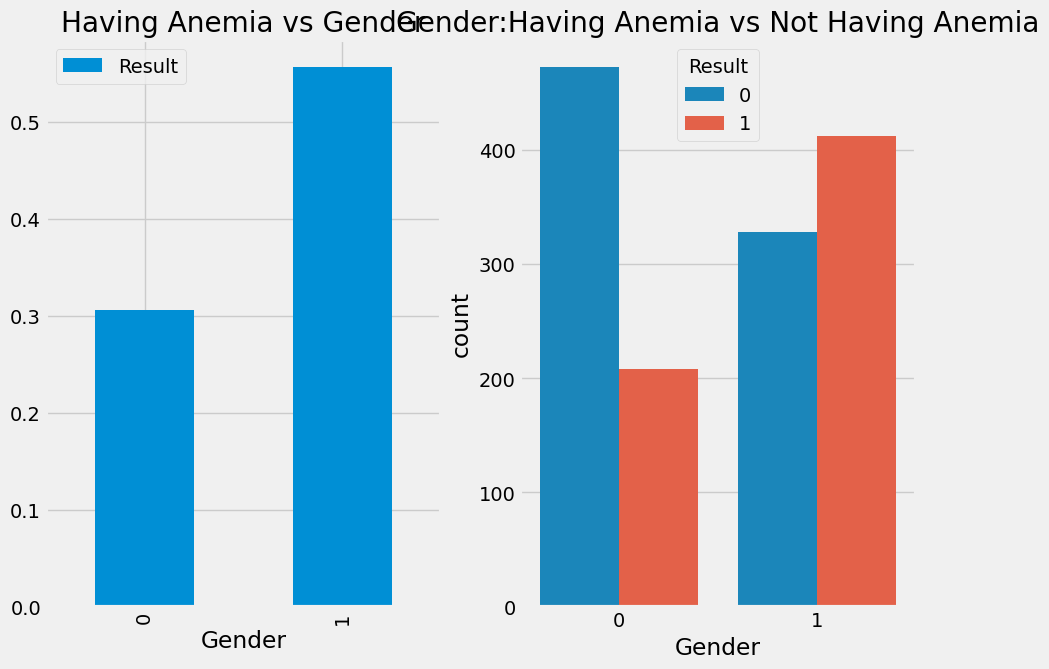

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['Gender','Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
sns.countplot(x='Gender',hue='Result',data=data,ax=ax[1]) # Change 'Gender' to x='Gender'
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()

Fitur lanjutan berdasar hemoglobin

In [ ]:
# See the min, max, mean values
print('The highest hemoglobin was of:',data['Hemoglobin'].max())
print('The lowest hemoglobin was of:',data['Hemoglobin'].min())
print('The average hemoglobin in the data:',data['Hemoglobin'].mean())

The highest hemoglobin was of: 16.9
The lowest hemoglobin was of: 6.6
The average hemoglobin in the data: 13.412737508796623


Kadar hemoglobin yang lebih rendah dari normal mengindikasikan anemia. Kisaran hemoglobin normal umumnya didefinisikan sebagai 13,2 hingga 16,6 gram (g) hemoglobin per desiliter (dL) darah untuk pria dan 11,6 hingga 15 g/dL untuk wanita.

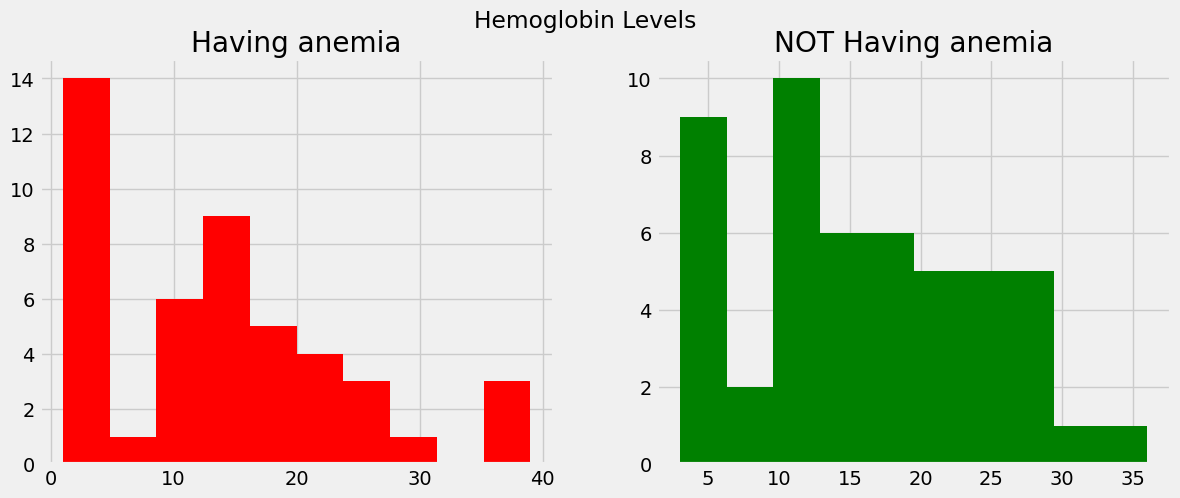

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['Hemoglobin'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['Hemoglobin'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('Hemoglobin Levels')
plt.show()

MCH (Mean Corpuscular Homoglobin)
perhitungan sel darah merah untuk mengetahui jumlah rata-rata hemoglobin pada satu eritrosit atau sel darah merah

In [ ]:
# See the min, max, mean values
print('The highest MCH was of:',data['MCH'].max())
print('The lowest MCH was of:',data['MCH'].min())
print('The average MCH in the data:',data['MCH'].mean())

The highest MCH was of: 30.0
The lowest MCH was of: 16.0
The average MCH in the data: 22.90562983814215


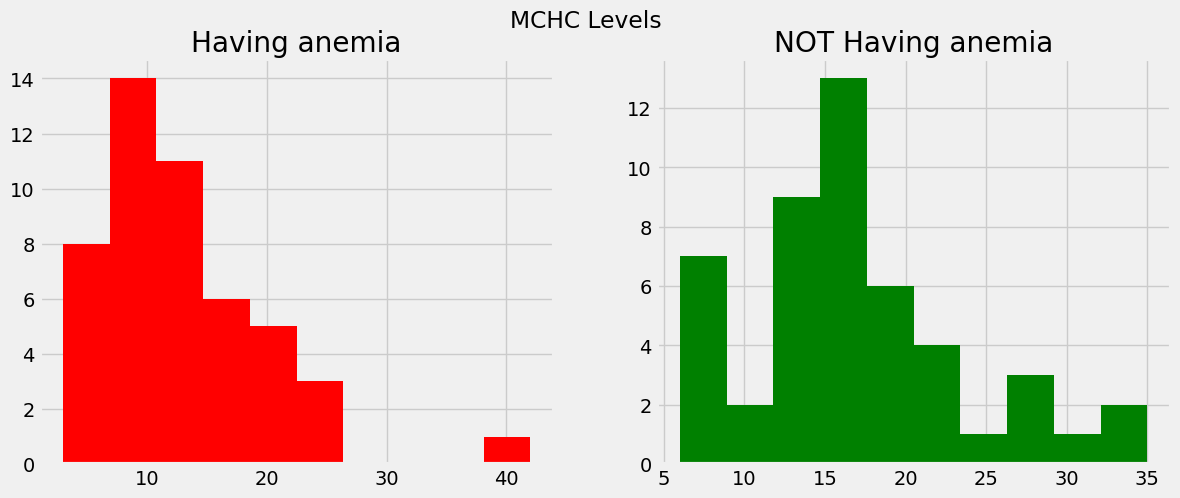

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['MCHC'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['MCHC'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCHC Levels')
plt.show()

MCV (Mean Corpuscular Volume) pemeriksaan darah untuk menentukan jenis anemia

In [ ]:
# See the min, max, mean values
print('The highest MCV was of:',data['MCV'].max())
print('The lowest MCV was of:',data['MCV'].min())
print('The average MCV in the data:',data['MCV'].mean())

The highest MCV was of: 101.6
The lowest MCV was of: 69.4
The average MCV in the data: 85.5237860661506


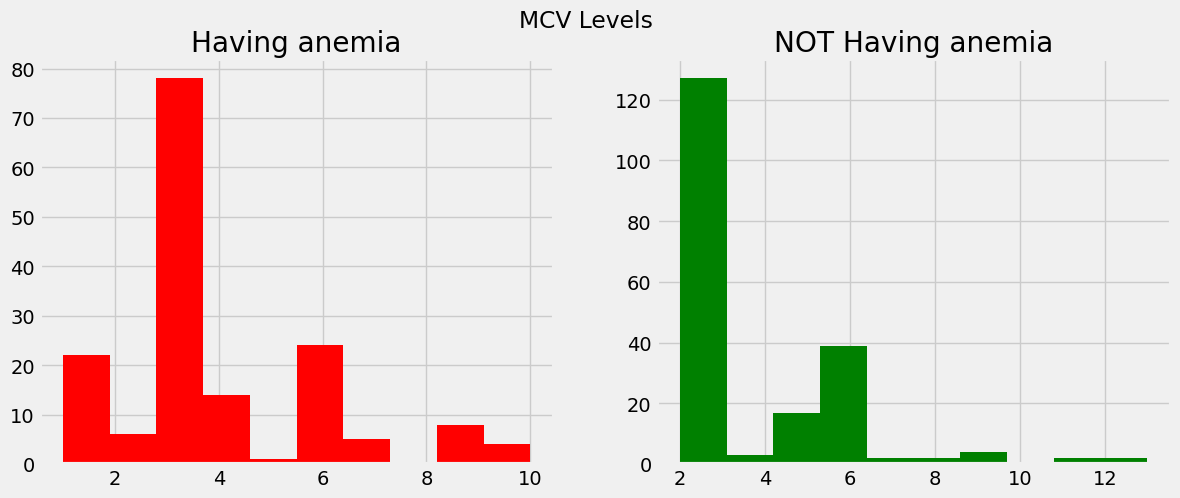

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['Result']==1]['MCV'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having anemia')
data_len=data[data['Result']==0]['MCV'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having anemia')
fig.suptitle('MCV Levels')
plt.show()

Rekayasa Fitur dan Pembersihan Data

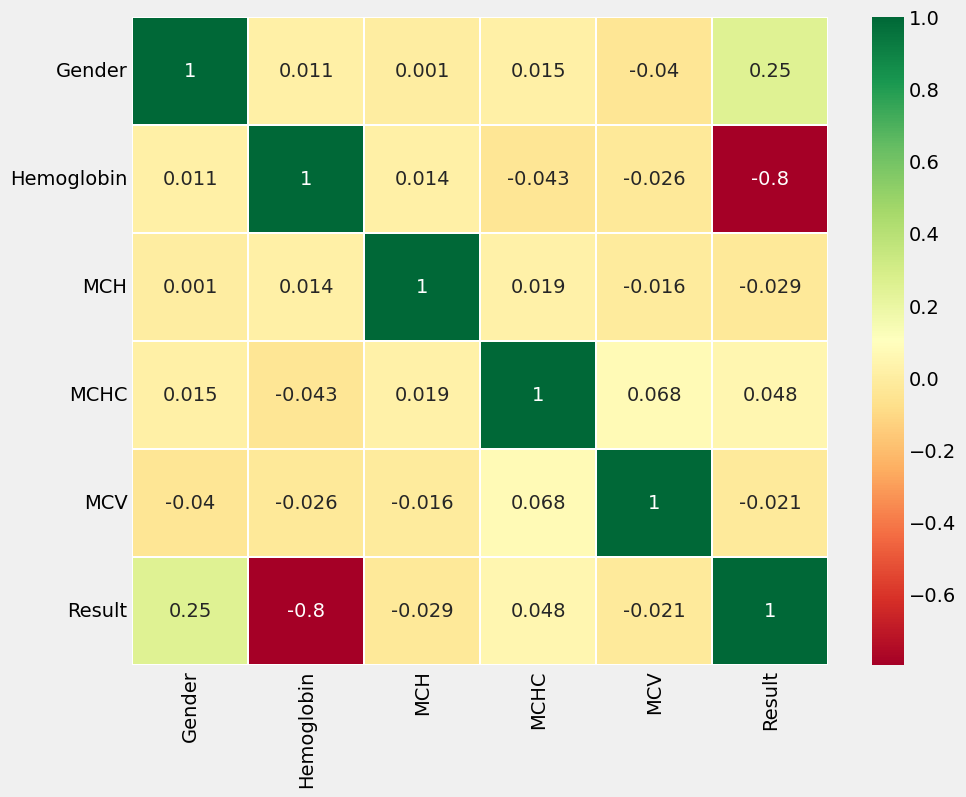

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [ ]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(data.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Hemoglobin", "MCH", "MCHC", "MCV"])
scaled_df.head()

,Hemoglobin,MCH,MCHC,MCV
0,0.029155,0.025904,0.025491,0.025799
1,0.031112,0.028985,0.024790,0.022193
2,0.017611,0.024535,0.025929,0.021946
3,0.029155,0.018258,0.027506,0.026970
4,0.028764,0.025105,0.024703,0.030669


Pemodelam Prediktif

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

Bagi untuk data training dan data testing

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Result'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['Result']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(994, 994, 427, 427)

Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.9648711943793911


Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.9859484777517564


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 1.0


Decision tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 1.0


KNN

In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8899297423887588


Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.955503512880562


Random Forests

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 1.0


Cross Validation

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.994366,0.008213
Radial Svm,0.902191,0.019214
Logistic Regression,0.991554,0.007586
KNN,0.900079,0.028450
Decision Tree,1.000000,0.000000
Naive Bayes,0.938782,0.023560
Random Forest,1.000000,0.000000


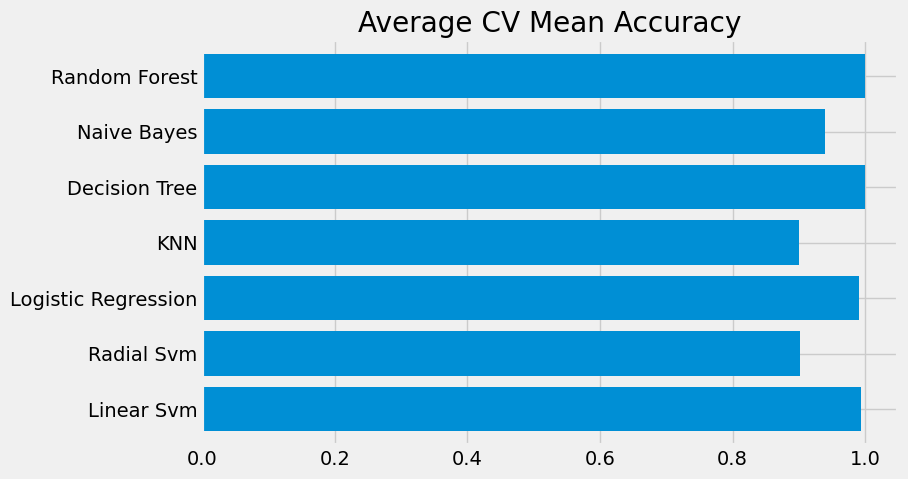

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

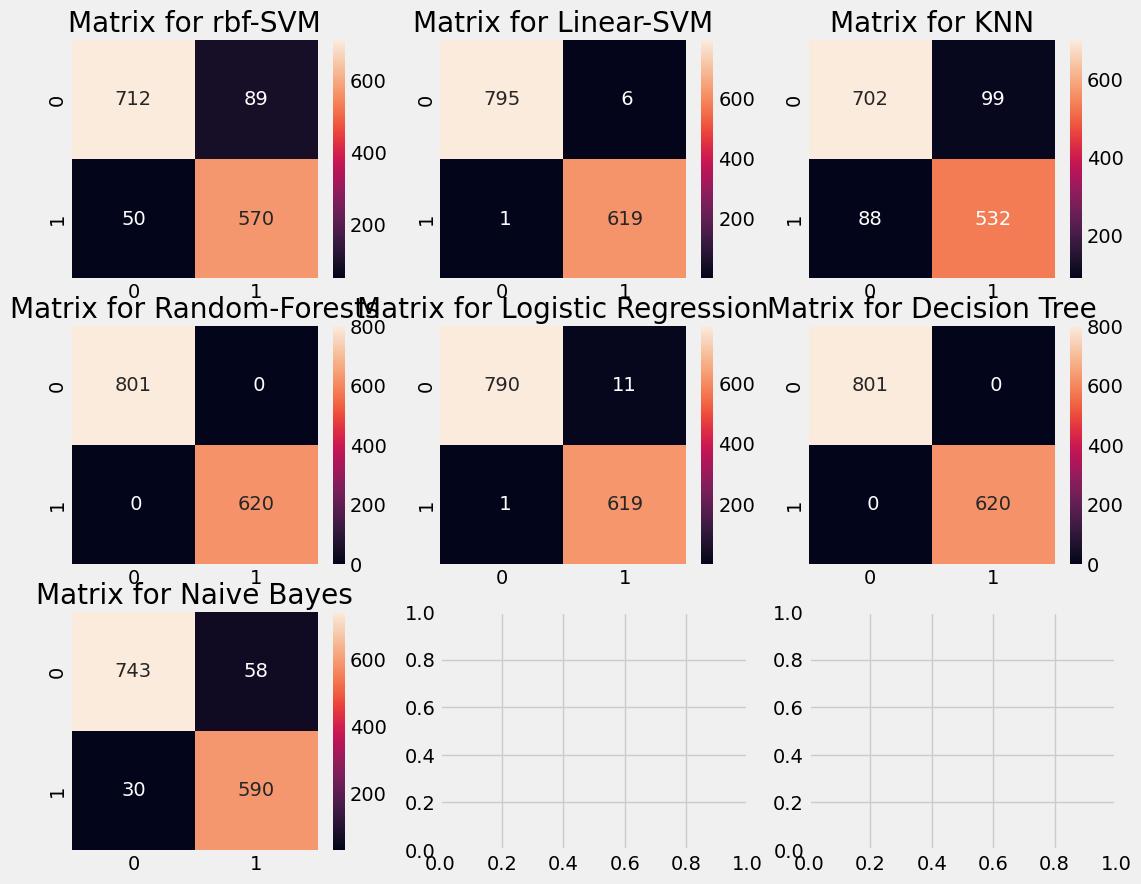

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 1.0
The cross validated score is : 0.995774647887324


Boosting
Add Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 1.0


GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 1.0


XGBoost

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 1.0


Menggunakan LIME

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=55942c4039aad3835a91b2b038981a1a25595e43fe3ce8b4e227cba17cff125a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Melatih model Logistic Regression (contoh)
model = LogisticRegression()
model.fit(train_X, train_Y)

# Membuat LIME explainer
explainer = LimeTabularExplainer(train_X.values,
                                 feature_names=train_X.columns,
                                 class_names=['No Anemia', 'Had Anemia'],
                                 verbose=True, mode='classification')

# Ambil sampel dari test set
sample = test_X.iloc[0]

# Membuat penjelasan untuk sampel pertama
exp = explainer.explain_instance(sample.values, model.predict_proba, num_features=5)

# Menampilkan hasil penjelasan
exp.show_in_notebook()


Intercept 0.6408192392042122
Prediction_local [-0.03330957]
Right: 0.0002835154598940557


Menggunakan SHAP

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.1 MB/s eta 0:00:00


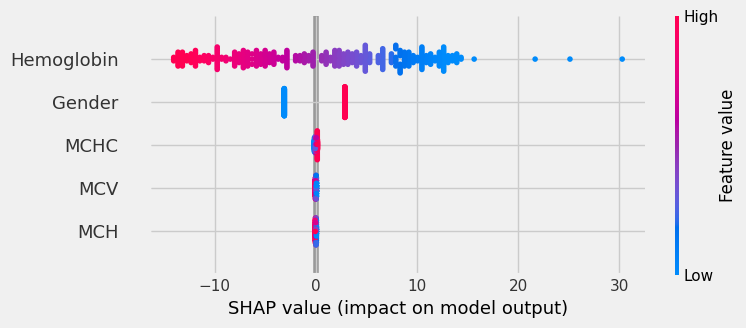

In [ ]:
import shap

# Melatih model Logistic Regression (contoh)
model = LogisticRegression()
model.fit(train_X, train_Y)

# Membuat explainer SHAP
explainer = shap.Explainer(model, train_X)

# Menghitung nilai SHAP untuk test set
shap_values = explainer(test_X)

# Visualisasi SHAP values (summary plot)
shap.summary_plot(shap_values, test_X)
